### Chi-square test

The chi-square test is a statistical test used to determine whether there is a significant association between two categorical variables. It is a non-parametric test that compares the observed frequencies in a contingency table with the frequencies that would be expected if the variables were independent.

The chi-squared test statistic, denoted as $(X^2)$, is calculated using the following formula:

$[ X^2 = \sum \frac{(O_i - E_i)^2}{E_i} ]$

Where:
- Observed Frequencies $(O_i)$.
  - These are the actual counts or occurrences observed in the data. In the chi-squared test, you compare these observed counts to what you would expect based on a theoretical distribution.

- Expected Frequencies $(E_i)$.
  - For a continuous distribution, the expected frequencies are often calculated based on a theoretical distribution. In this example, since we're dealing with the sum of squares of standard normal 
  variables, we expect the resulting distribution to follow a chi-squared distribution.
- Calculation of the Statistic:
  - For each category or bin, you take the square of the difference between the observed and expected counts.
  - You then divide this squared difference by the expected count for that category.
  - This process is done for each category, and the results are summed up.
  
This formula is often used in the context of contingency tables where we compare observed frequencies ($O_i$) with expected frequencies ($E_i$) under a specific hypothesis. The test assesses whether there is a significant difference between the observed and expected frequencies, considering the variability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, Latex
pd.set_option("mode.chained_assignment", "raise")

<IPython.core.display.Latex object>

         men  women
Dislike  301    334
Like     183    182
Fail to reject the null hypothesis. The distribution is consistent with expectations.


Chi-squared Statistic: 0.5892017678070834
P-value: 0.4427279562503772
Significance Level: 0.05
Degree of Freedom : 1


<IPython.core.display.Latex object>

            Men   Women
Dislike  307.34  327.66
Like     176.66  188.34


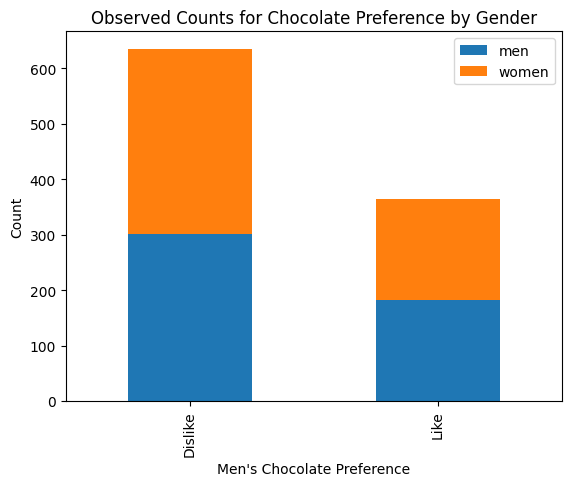

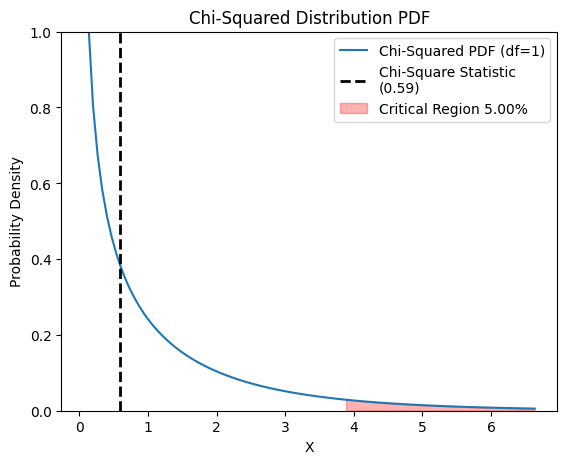

In [2]:
np.random.seed(42)
num_samples = 1000
preferences = np.random.choice(["Like", "Dislike"], size=num_samples, p=[0.35, 0.65])
gender      = np.random.choice(["men", "women"], size=num_samples, p=[0.5, 0.5])

df = pd.DataFrame({"preferences": preferences, "gender": gender})

contingency_table = pd.crosstab(
    index=df["preferences"], columns=df["gender"], margins=False, margins_name="sum"
)
contingency_table.columns.name = None
contingency_table.index.name = None

# Perform the chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

display(Latex(f"Observed Frequencies $(O_i)$"))
print(contingency_table)

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. The distribution is not as expected.")
else:
    print(
        "Fail to reject the null hypothesis. The distribution is consistent with expectations."
    )

expected_df = pd.DataFrame(expected, index=["Dislike", "Like"], columns=["Men", "Women"])

print("\n")
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Significance Level: {alpha}")
print(f"Degree of Freedom : {dof}")

display(Latex(f"Expected Frequencies $(E_i)$"))
print(expected_df)

# Plot the observed counts
contingency_table.plot(kind="bar", stacked=True)
plt.title("Observed Counts for Chocolate Preference by Gender")
plt.xlabel("Men's Chocolate Preference")
plt.ylabel("Count")
plt.show()

# Plot the PDF of the chi-squared distribution
rows, columns = contingency_table.shape
degrees_of_freedom = (rows - 1) * (columns - 1)

x_values = np.linspace(0, stats.chi2.ppf(0.99, degrees_of_freedom), 100)
pdf_values = stats.chi2.pdf(x_values, degrees_of_freedom)
cdf_values = stats.chi2.cdf(x_values, degrees_of_freedom)
critical_region = 1- cdf_values < alpha

plt.ylim(0, plt.ylim()[1])
plt.subplots_adjust(top=0.9)

plt.plot(
    x_values,
    pdf_values,
    label=f"Chi-Squared PDF (df={degrees_of_freedom})",
)

plt.axvline(
    chi2_stat,
    color="black",
    linestyle="dashed",
    linewidth=2,
    label=f"Chi-Square Statistic\n({chi2_stat:.2f})",
)

plt.fill_between(
    x_values,
    pdf_values,
    where=critical_region,
    color="red",
    alpha=0.3,
    interpolate=True,
    label=f"Critical Region {alpha:.2%}",
)

plt.title("Chi-Squared Distribution PDF")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

The `chi2_contingency` function in Scipy calculates the expected values based on the observed contingency table. It assumes that the null hypothesis is true, meaning there is no association between the variables. The expected values are then computed as if the distribution of the variables were independent.

### Expected Value Calculation:

1. **Calculate Row and Column Totals:**
   - Sum the values in each row and column to get the row totals and column totals.

2. **Calculate Expected Values:**
   - For each cell in the contingency table, the expected value is calculated using the formula:
     $ [\text{Expected Value} = \frac{\text{Row Total} \times \text{Column Total}}{\text{Grand Total}}] $
     
     This formula assumes independence between the variables.
      <table>
        <tr>
          <th></th>
          <th>Men</th>
          <th>Women</th>
        </tr>
        <tr>
          <td>Dislike</td>
          <td>301</td>
          <td>334</td>
        </tr>
        <tr>
          <td>Like</td>
          <td>183</td>
          <td>182</td>
        </tr>
      </table>
     
      $[ \text{Expected Value for Men-Dislike} = \frac{(301+183) \times (301+334)}{1000} = \frac{484 \times 635}{1000} \approx 307.34 ]$

      $[ \text{Expected Value for Men-Like} = \frac{(183+301) \times (183+182)}{1000} = \frac{484 \times 365}{1000} \approx 176.66 ]$

      $[ \text{Expected Value for Women-Dislike} = \frac{(334+182) \times (301+334)}{1000} = \frac{516 \times 635}{1000} \approx 327.66 ]$

      $[ \text{Expected Value for Women-Like} = \frac{(334+182) \times (183+182)}{1000} = \frac{516 \times 365}{1000} \approx 188.34 ]$




3. **Compute the Chi-Squared Statistic:**
   - Once you have the observed ($O_{ij}$) and expected ($(E_{ij})$) values, the chi-squared statistic ($\chi^2$) is calculated using the formula:
     $ [ \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}} ] $
     
     where \(i, j\) represent the cell indices.

4. **Calculate Degrees of Freedom:**
   - The degrees of freedom ($(df)$) for the chi-squared test are calculated as:

     $[df = ( \text{number of rows} - 1 ) \times ( \text{number of columns} - 1 )]$
     
     In your case, it's $(1 \times 1 = 1)$, as you have a 2x2 contingency table.

5. **Compute the Chi-Squared Statistic and P-Value:**
   - The chi-squared statistic ($\chi^2$) is computed based on the observed ($O_{ij}$) and expected ($E_{ij}$) values using the formula:
   
     $[\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}]$
     
     where $(i, j)$ represent the cell indices.
   - The p-value is determined by comparing the calculated chi-squared statistic to the chi-squared distribution with the specified degrees of freedom ($df$).

6. **Compute the Chi-Squared Statistic:**
   - Calculate the chi-squared statistic ($\chi^2$) using the observed ($O_{ij}$) and expected ($E_{ij}$) values:
     $ [\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}] $
     where $(i, j)$ represent the cell indices.
   
   - For each cell:
     $ [\chi^2 = \frac{(301 - 307.34)^2}{307.34} + \frac{(334 - 327.66)^2}{327.66} + \frac{(183 - 176.66)^2}{176.66} + \frac{(182 - 188.34)^2}{188.34} ] $


7. **Calculate Degrees of Freedom:**
   - The degrees of freedom ($df$) for the chi-squared test are given by:
     $ [df = (\text{number of rows} - 1) \times (\text{number of columns} - 1)] $
     In this case, it's $(2 - 1) \times (2 - 1) = 1$, as you have a 2x2 contingency table.
     
     $df = 1$

8. **Compute the P-Value:**
   - Determine the p-value by comparing the calculated chi-squared statistic to the chi-squared distribution with 1 degree of freedom.
    $ \chi^2 = 0.5892017678070834 $

9. **Conclusion:**
   - Based on the calculated p-value and a chosen significance level (commonly 0.05), make a decision regarding the null hypothesis. If the p-value is less than the significance level, you may reject the null hypothesis and conclude that there is evidence of an association between the variables.

**Note:** These calculations can be efficiently performed using the `scipy.stats.chi2_contingency` function in Python.
